In [3]:
# this is unrelated to the class .. It just helps displaying all outputs in a cell instead of just last one
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Recap: What do we know so far?
We know about different variables and objects in python such as lists, tuples and dictionaries

We know how to do loops and conditions in python

We know numpy

We know how to deal with files using Pandas

Our next step is to do some statistical processing, analysis and prediction on the data we read from files. Such as curve fitting, probability distribution fitting, clustering, decision trees, and finally machine learning. There are two famous libraries that data scientists use for these kind of operartions. The first is called Scipy and the second is called Scikit-learn. In this lecture, we will briefly dig into the world of these two libraries.

First we start with Scipy. Here are some of the common things we can use Scipy for

# Interpolation
Given some few samples that are based on an unknown function, can we predict the value for new data points within the range of these known samples


In [4]:
# first we simulate the samples
import numpy as np
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = np.sin(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = np.sin(x)

In [5]:
# now we use interpolation
import scipy.interpolate
linear_interpolation = scipy.interpolate.interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = scipy.interpolate.interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

<Figure size 720x720 with 0 Axes>

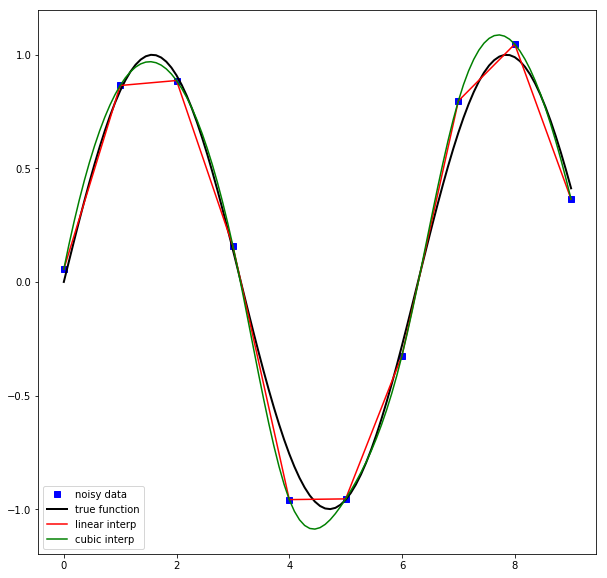

In [6]:
# and now we plot them all
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(n, y_meas, 'bs', label='noisy data')
plt.plot(x, y_real, 'k', lw=2, label='true function')
plt.plot(x, y_interp1, 'r', label='linear interp')
plt.plot(x, y_interp2, 'g', label='cubic interp')
plt.legend()

As you can see, cubic interpolation is closer to the truth and has better fitting

# Density Curve Fitting
We can also use Scipy to fit probability distribution functions (PDF). In the following example, we will generate some random samples with gaussian distribution then let Python guess what is the true PDF that fits best

(array([0.0085472 , 0.0170944 , 0.08547201, 0.21368002, 0.26496323,
        0.37607684, 0.36752964, 0.22222722, 0.10256641, 0.05128321]),
 array([-3.42043133, -2.83544449, -2.25045766, -1.66547082, -1.08048398,
        -0.49549714,  0.08948969,  0.67447653,  1.25946337,  1.84445021,
         2.42943705]),
 <a list of 10 Patch objects>)

Text(0.5, 0, 'Samples')

Text(0, 0.5, 'Density')

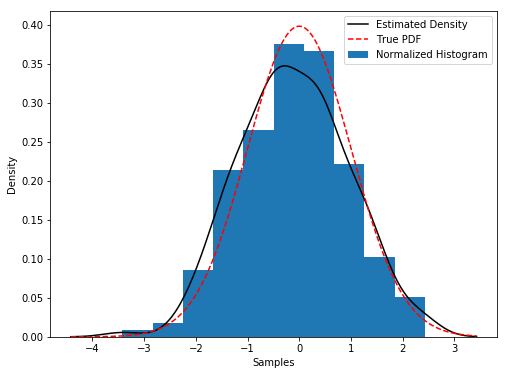

In [7]:
import scipy.stats
np.random.seed(12456)
x1 = np.random.normal(size=200)  # random data, normal distribution
xs = np.linspace(x1.min()-1, x1.max()+1, 200) # generate the data that we will predict for

kde1 = scipy.stats.gaussian_kde(x1)  # find out the best fit

fig = plt.figure(figsize=(8, 6))

plt.hist(x1, density=True, label='Normalized Histogram')  # rug plot
plt.plot(xs, kde1(xs), 'k-', label="Estimated Density")  # test your fit
plt.plot(xs, scipy.stats.norm.pdf(xs), 'r--', label="True PDF")  # show the real distribution
plt.xlabel('Samples')
plt.ylabel('Density')
plt.legend()

Scipy also supports ttest to test different stats about samples. For example if sample distribution is similar to mean distribution

In [8]:
scipy.stats.ttest_1samp(kde1.resample(2000)[0],x1.mean())

Ttest_1sampResult(statistic=0.49609924837561586, pvalue=0.6198789297578237)

With a high P-value that shows that our population mean is close to the sample mean